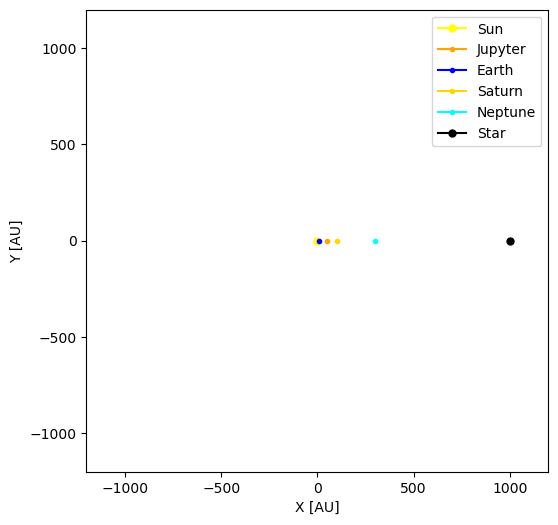

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D


positions = np.load('positions_history_2D.npy')[::1000]
t_vals = np.load('time_history_2D.npy')[::1000]
n_steps = t_vals.shape[0]
n_planets = 6

planet_names = ['Sun', 'Jupyter', 'Earth', 'Saturn', 'Neptune', 'Star']

colors_planets = ["yellow", "orange", "blue", 'gold', 'cyan', 'black']

fig, ax = plt.subplots(figsize=(6, 6))
ax.set_aspect('equal')

max_range = np.amax(positions) * 1.2
ax.set_xlim(-max_range, max_range)
ax.set_ylim(-max_range, max_range)

ax.set_xlabel("X [AU]")
ax.set_ylabel("Y [AU]")

scatters = []
for i in range(n_planets):
    sc, = ax.plot([], [], marker="o", markersize=5 if i==0 or i==5 else 3,
                  color=colors_planets[i], label=planet_names[i])
    scatters.append(sc)

ax.legend()

def update(frame):
    for i, sc in enumerate(scatters):
        x, y, z = positions[frame, i]
        sc.set_data([x], [y])
    return scatters

from matplotlib.animation import FFMpegWriter

writer = FFMpegWriter(fps=20, metadata=dict(artist='Me'), bitrate=1800)

ani = FuncAnimation(fig, update, frames=n_steps, interval=10., blit=False)
ani.save('solar_system_2D.mp4', writer=writer)

#plt.show()